In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar PCA y obtener los componentes principales
def pca(data, num_components):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = np.cov(centered_data.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    eigenvalues = eigenvalues[idx]
    return mean, eigenvectors[:, :num_components], eigenvalues[:num_components]



# Función para ajustar el modelo a una nueva imagen
def fit_model(new_points, mean_shape, eigenvectors):
    centered_points = new_points.reshape(-1) - mean_shape
    weights = np.dot(centered_points, eigenvectors)
    fitted_shape = mean_shape + np.dot(weights, eigenvectors.T)
    return fitted_shape.reshape(-1, 2)



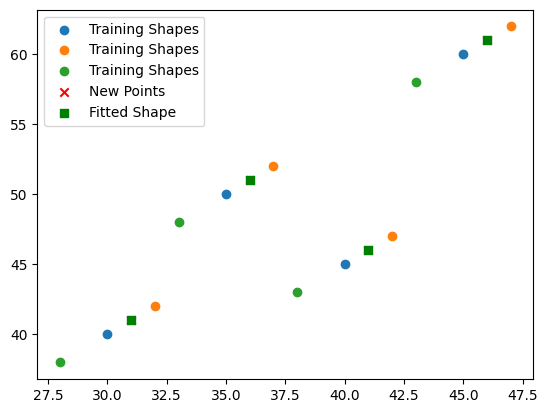

In [2]:
# Ejemplo de puntos de control en imágenes de entrenamiento (dummy data)
points_training = [
    np.array([[30, 40], [35, 50], [40, 45], [45, 60]]),
    np.array([[32, 42], [37, 52], [42, 47], [47, 62]]),
    np.array([[28, 38], [33, 48], [38, 43], [43, 58]])
]

# Convertir puntos de control a una matriz de datos
data = np.array(points_training).reshape(len(points_training), -1)

# Realizar PCA en los puntos de control
mean_shape, eigenvectors, eigenvalues = pca(data, num_components=2)

# Puntos de control en una nueva imagen (dummy data)
new_points = np.array([[31, 41], [36, 51], [41, 46], [46, 61]])

# Ajustar el modelo a la nueva imagen
fitted_shape = fit_model(new_points, mean_shape, eigenvectors)

# Visualizar los resultados
plt.figure()
for points in points_training:
    plt.scatter(points[:, 0], points[:, 1], marker='o', label='Training Shapes')
plt.scatter(new_points[:, 0], new_points[:, 1], marker='x', color='red', label='New Points')
plt.scatter(fitted_shape[:, 0], fitted_shape[:, 1], marker='s', color='green', label='Fitted Shape')
plt.legend()
plt.show()